In [1]:
"""
PLANO FIT

Programa para definição de metas, planejamento de alimentação e acompanhamento de exercícios e evolução,

"""

'\nPLANO FIT\n\nPrograma para definição de metas, planejamento de alimentação e acompanhamento de exercícios e evolução,\n\n'

In [2]:
# IMPORTS

import matplotlib.pyplot as plt
import pandas as pd
import re
import os
import unicodedata
from datetime import datetime, timedelta, date
import sys

In [3]:
# FUNÇÕES ÚTEIS

# FUNÇÃO: LIMPAR TEXTO
def limpar_texto_bruto(txt):
    """Limpa e formata strings de texto."""
    if pd.isna(txt):
        return ""
    
    txt = str(txt)
    txt = txt.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    txt = re.sub(r'\s+', ' ', txt)
    txt = ''.join(c for c in txt if unicodedata.category(c)[0] != 'C')
    txt = re.sub(r'[^\w\s.,;:()-]', '', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    
    return txt

# FUNÇÃO: LIMPAR VALOR NUMÉRICO
def limpar_valor_numerico(valor):
    """Converte um valor em string para float, tratando possíveis erros."""
    if pd.isna(valor):
        return 0.0
    valor_limpo = str(valor).replace('*', '').strip()
    if valor_limpo == '':
        return 0.0
    try:
        return float(valor_limpo.replace(',', '.'))  # caso use vírgula como decimal
    except ValueError:
        return 0.0

# FUNÇÃO: NORMALIZAR TEXTO
def normalizar_texto(txt):
    """Normaliza texto para comparações (minúsculas e sem acentos)."""
    if pd.isna(txt):
        return ""
    txt = str(txt).lower()
    txt = ''.join(c for c in unicodedata.normalize('NFD', txt)
                if unicodedata.category(c) != 'Mn')
    txt = re.sub(r'[^a-z0-9\s]', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    return txt

In [4]:
# CARREGAMENTO DE DADOS

tabela_alimentacao_path = 'tabela_alimentacao.csv'
tabela_recomendacao_path = 'recomendacao_diaria.csv'

# Carrega e processa a tabela de alimentação
tabela_alimentacao = pd.read_csv(tabela_alimentacao_path, encoding='latin1', sep=';', on_bad_lines='skip')
tabela_alimentacao['Alimento'] = tabela_alimentacao['Alimento'].apply(limpar_texto_bruto)
tabela_alimentacao['Alimento_proc'] = tabela_alimentacao['Alimento'].apply(normalizar_texto)
colunas_nutrientes = ['Proteina(g)', 'Carboidrato(g)', 'Lipideos(g)', 'Sodio(mg)', 'Energia(kcal)']
for col in colunas_nutrientes:
    tabela_alimentacao[col] = tabela_alimentacao[col].apply(limpar_valor_numerico)

print("TABELA ALIMENTAÇÃO CARREGADA:")
#print(tabela_alimentacao.head(3))

# Carrega e processa a tabela de recomendação
df_rec = pd.read_csv(tabela_recomendacao_path, encoding='latin1', sep=';', on_bad_lines='skip')
tabela_recomendacao = df_rec.iloc[0:6, :]  # Ajuste conforme necessário

print("\nTABELA RECOMENDAÇÃO CARREGADA:")
#print(tabela_recomendacao.head(3))

TABELA ALIMENTAÇÃO CARREGADA:

TABELA RECOMENDAÇÃO CARREGADA:


In [5]:
# IMPUT DE DADOS PESSOAIS

dados_pessoais_path = 'dados_pessoais.csv'

if os.path.exists(dados_pessoais_path):
    # Carrega os dados pessoais já salvos
    df_pessoais = pd.read_csv(dados_pessoais_path)
    nome = df_pessoais['nome'].values[0]
    nascimento = df_pessoais['nascimento'].values[0]
    altura = df_pessoais['altura'].values[0]
    sexo = df_pessoais['sexo'].values[0]
    try:    
        df_evolucao = pd.read_csv('evolucao.csv')
        peso = df_evolucao['peso'].iloc[-1]
    except:
        peso = df_pessoais['peso'].values[0]
    gordura_corporal = df_pessoais['gordura_corporal'].values[0]
    gordura_visceral = df_pessoais['gordura_visceral'].values[0]
    musculo = df_pessoais['massa_muscular'].values[0]

    # Calcula idade
    data_nasc = datetime.strptime(nascimento, "%d/%m/%Y")
    hoje = datetime.today()
    idade = hoje.year - data_nasc.year - ((hoje.month, hoje.day) < (data_nasc.month, data_nasc.day))

    print("Dados pessoais carregados:")
    print(df_pessoais)
else:
    # Solicita os dados pessoais do usuário
    nome = input("Digite seu nome: ")
    nascimento = input("Digite sua data de nascimento (DD/MM/AAAA): ")
    altura = float(input("Digite sua altura em metros (ex: 1.75): "))
    sexo = input("Digite seu sexo (M/F): ").upper()

    # Procura o último valor de peso no arquivo de evolução.
    if os.path.exists('evolucao.csv'):
        df_evolucao = pd.read_csv('evolucao.csv')
        if not df_evolucao.empty and 'peso' in df_evolucao.columns:
            peso = df_evolucao['peso'].iloc[-1]
            print(f"Usando o peso mais recente de {peso} kg.")
        else:
            peso = float(input("Digite seu peso em kg (ex: 80.7): "))
    else:
        peso = float(input("Digite seu peso em kg (ex: 80.7): "))

    gordura_corporal = input("Digite sua gordura corporal em % (ex: 23.2): ")  # (%)
    if gordura_corporal == '':
        gordura_corporal = 0.0
    else:
        gordura_corporal = float(gordura_corporal)
        
    gordura_visceral = input("Digite sua gordura visceral em % (ex: 12.1): ")  # (%)
    if gordura_visceral == '':
        gordura_visceral = 0.0
    else:
        gordura_visceral = float(gordura_visceral)

    musculo = input("Digite sua massa muscular em % (ex: 35.0): ")  # (%)
    if musculo == '':
        musculo = 0.0
    else:
        musculo = float(musculo)

    # Calcula idade
    data_nasc = datetime.strptime(nascimento, "%d/%m/%Y")
    hoje = datetime.today()
    idade = hoje.year - data_nasc.year - ((hoje.month, hoje.day) < (data_nasc.month, data_nasc.day))

    # Cria DataFrame e salva
    df_pessoais = pd.DataFrame([{
        'nome': nome,
        'nascimento': nascimento,
        'altura': altura,
        'sexo': sexo,
        'peso': peso,
        'idade': idade,
        'gordura_corporal': gordura_corporal,
        'gordura_visceral': gordura_visceral,
        'massa_muscular': musculo
    }])
    df_pessoais.to_csv(dados_pessoais_path, index=False)
    print("Dados pessoais salvos.")

# Para acessar os dados pessoais:
dados_pessoais = df_pessoais.iloc[0].to_dict()

Dados pessoais carregados:
          nome  nascimento  altura sexo  peso  idade  gordura_corporal  \
0  Flavio Dias  28/08/1994     1.8    M   0.0     30              28.0   

   gordura_visceral  massa_muscular  
0              10.0            35.0  


In [6]:
# INPUT DO OBJETIVO

objetivo_path = 'objetivo_salvo.csv'

if os.path.exists(objetivo_path):
    df_objetivo = pd.read_csv(objetivo_path)
    inicio_objetivo = df_objetivo['DataInicio'].values[0]
    intensidade = df_objetivo['Atividade'].values[0]
    ambiente = df_objetivo['Ambiente'].values[0]
    objetivo = df_objetivo['ObjetivoPeso'].values[0]
    print("Objetivo carregado:")
    print(df_objetivo)
    dados_objetivo = df_objetivo.iloc[0].tolist()
else:
    inicio_objetivo = input("Digite a data de início do objetivo (DD/MM/AAAA): ").lower()
    intensidade = input("Digite o nível de atividade física (sedentario, leve, moderado, intenso, extremo): ").lower()
    ambiente = input("Digite a condição do ambiente (frio, ameno, quente): ").lower()
    objetivo = input("Digite seu objetivo de peso (perda, manutencao, ganho): ").lower()
    
    df_objetivo = pd.DataFrame([{
        'DataInicio': inicio_objetivo,
        'Atividade': intensidade,
        'Ambiente': ambiente,
        'ObjetivoPeso': objetivo
    }])
    df_objetivo.to_csv(objetivo_path, index=False)
    print("Objetivo salvo.")

Objetivo carregado:
   DataInicio Atividade Ambiente ObjetivoPeso
0  20/05/2025  moderado    ameno        perda


In [7]:
# CÁLCULOS DE ENERGIA E IMC

# dados_pessoais = [nome, nascimento, altura, sexo, peso, idade]
# índice:           0          1            2       3      4     5

# TMB
if sexo == 'M':
    TMB = 88.362 + (13.397 * peso) + (4.799 * altura * 100) - (5.677 * idade)
else:
    TMB = 447.593 + (9.247 * peso) + (3.092 * altura * 100) - (4.330 * idade)

# IMC 
IMC = peso / (altura ** 2)

def classificar_imc(IMC):
    """Classifica o IMC de acordo com a tabela padrão."""
    if IMC < 18.5:
        return "(Abaixo do peso)"
    elif IMC <= 24.9:
        return "(Peso normal)"
    elif IMC <= 29.9:
        return "(Sobrepeso)"
    elif IMC <= 35:
        return "(Obesidade grau I)"
    elif IMC <= 40:
        return "(Obesidade grau II)"
    else:
        return "(Obesidade grau III)"

# TDEE
fatores = {
    "sedentario": 1.2,
    "leve": 1.375,
    "moderado": 1.55,
    "intenso": 1.725,
    "extremo": 1.9
}

if intensidade in fatores:
    TDEE = (10 * peso + 6.25 * altura * 100 - 5 * idade + 5) * fatores[intensidade]
else:
    TDEE = "TDEE inválido"


# Gordura corporal, visceral e músculos
tabela_gordura = pd.DataFrame({
    "classificacao": ["Baixa", "Normal", "Elevada", "Muito Elevada"],
    "homem_min": [0, 11, 21, 26],
    "homem_max": [10, 20, 25, 100],
    "mulher_min": [0, 21, 31, 36],
    "mulher_max": [20, 30, 35, 100],
})

tabela_visceral = pd.DataFrame({
    "classificacao": ["Normal", "Elevada", "Muito Elevada"],
    "min": [0, 10, 16],
    "max": [9, 15, 100],
})

tabela_musculo = pd.DataFrame({
    "classificacao": ["Baixo", "Normal", "Excelente"],
    "homem_min": [0, 34, 40],
    "homem_max": [33, 39, 100],
    "mulher_min": [0, 24, 30],
    "mulher_max": [23, 29, 100],
})

# --- Funções para buscar classificação da gordura e músculo ---
def classificar_gordura(valor, sexo):
    """Classifica o percentual de gordura corporal."""
    if sexo == "M":
        mask = (tabela_gordura["homem_min"] <= valor) & (valor <= tabela_gordura["homem_max"])
    else:
        mask = (tabela_gordura["mulher_min"] <= valor) & (valor <= tabela_gordura["mulher_max"])
    return tabela_gordura.loc[mask, "classificacao"].values[0]

def classificar_visceral(valor):
    """Classifica o percentual de gordura visceral."""
    mask = (tabela_visceral["min"] <= valor) & (valor <= tabela_visceral["max"])
    return tabela_visceral.loc[mask, "classificacao"].values[0]

def classificar_musculo(valor, sexo):
    """Classifica o percentual de massa muscular."""
    if sexo == "M":
        mask = (tabela_musculo["homem_min"] <= valor) & (valor <= tabela_musculo["homem_max"])
    else:
        mask = (tabela_musculo["mulher_min"] <= valor) & (valor <= tabela_musculo["mulher_max"])
    return tabela_musculo.loc[mask, "classificacao"].values[0]

resultado = {
    "IMC": f"{round(IMC,2)} {classificar_imc(IMC)}",
    "Gordura Corporal": f"{gordura_corporal} % ({classificar_gordura(gordura_corporal, sexo)})",
    "Gordura Visceral": f"{gordura_visceral} % ({classificar_visceral(gordura_visceral)})",
    "Músculo": f"{musculo} % ({classificar_musculo(musculo, sexo)})",
    "TMB": round(TMB, 2),
    "TDEE": round(TDEE, 2) if isinstance(TDEE, (int, float)) else TDEE
}

df_resultado = pd.DataFrame([resultado])
print(df_resultado)


                 IMC        Gordura Corporal  Gordura Visceral  \
0  28.46 (Sobrepeso)  28.0 % (Muito Elevada)  10.0 % (Elevada)   

           Músculo      TMB    TDEE  
0  35.0 % (Normal)  2017.08  2948.1  


In [8]:
# METAS

# Alvo calórico
if objetivo == "perda":
    alvo_calorico = TDEE * 0.8
elif objetivo == "manutencao":
    alvo_calorico = TDEE * 1
elif objetivo == "ganho":
    alvo_calorico = TDEE * 1.15
else:
    alvo_calorico = "Nível inválido"

# Peso ideal (máximo)
peso_ideal = 24.9 * (altura ** 2) # em kg

# Variação semanal esperada
if isinstance(alvo_calorico, (int, float)):
    caloric_deficit = TDEE - alvo_calorico
    var_semanal = (caloric_deficit * 7) / 7700  # 7700 kcal = 1 kg
    var_semanal_percent = (var_semanal / peso) * 100
else:
    var_semanal = 0
    var_semanal_percent = 0
    
# Duração e data do objetivo
if var_semanal != 0:
    duracao_objetivo_semanas = abs((peso - peso_ideal) / var_semanal)
    duracao_objetivo_meses = duracao_objetivo_semanas / 4.345
    data_objetivo = datetime.strptime(inicio_objetivo, "%d/%m/%Y") + timedelta(days=duracao_objetivo_semanas * 7)
    data_objetivo_data = data_objetivo.strftime("%d/%m/%Y")
    delta_date = date(data_objetivo.year, data_objetivo.month, data_objetivo.day) - datetime.date(datetime.today())
else:
    duracao_objetivo_meses = 0
    data_objetivo_data = "N/A"

print('Peso ideal:', round(peso_ideal, 2), 'kg', '(', round(peso_ideal - peso, 2), 'kg)')
print('Alvo calórico:', round(alvo_calorico, 2), 'kcal')
print('Variação de peso semanal', round(var_semanal, 2), 'kg', '(', round(var_semanal_percent, 2), '%)')
print('Duração do objetivo:', round(duracao_objetivo_meses, 2), 'meses')
print("Data esperada de conclusão do objetivo:", data_objetivo_data, '(', delta_date.days, 'dias a partir de hoje)')

Peso ideal: 80.68 kg ( -11.52 kg)
Alvo calórico: 2358.48 kcal
Variação de peso semanal 0.54 kg ( 0.58 %)
Duração do objetivo: 4.95 meses
Data esperada de conclusão do objetivo: 17/10/2025 ( 51 dias a partir de hoje)


In [9]:
# META DE ÁGUA

# Parte intensidade
if intensidade == "leve":
    bonus_intensidade = 200
elif intensidade == "moderado":
    bonus_intensidade = 400
elif intensidade == "intenso":
    bonus_intensidade = 600
elif intensidade == "extremo":
    bonus_intensidade = 800
else:
    bonus_intensidade = 0

# Parte ambiente
if ambiente == "frio":
    bonus_ambiente = 0
elif ambiente == "ameno":
    bonus_ambiente = 200
elif ambiente == "quente":
    bonus_ambiente = 300
else:
    bonus_ambiente = 0

# Parte sexo e idade
if sexo == "M":
    if idade < 60:
        bonus_sexo = 150
    elif idade >= 60:
        bonus_sexo = -150
    else:
        bonus_sexo = 0
elif sexo == "F":
    if idade >= 60:
        bonus_sexo = -150
    else:
        bonus_sexo = 0
else:
    bonus_sexo = 0

qtd_agua = (peso * 30 + bonus_intensidade + bonus_ambiente + bonus_sexo) / 1000

print('Quantidade de água diária: ', qtd_agua, 'L')

Quantidade de água diária:  3.516 L


In [10]:
# ALIMENTAÇÃO

# FUNÇÃO: buscar alimento
def buscar_alimento(palavra, tabela):
    """Busca um alimento na tabela e retorna a linha correspondente."""
    palavra_proc = normalizar_texto(palavra)
    resultados = tabela[tabela['Alimento_proc'].str.contains(palavra_proc, na=False, regex=False)]
    if resultados.empty:
        print(f"Nenhum alimento encontrado para: {palavra}")
        return None
    if len(resultados) == 1:
        return resultados.iloc[0]['Alimento']
    print(f"Vários alimentos encontrados para '{palavra}':")
    opcoes = resultados['Alimento'].tolist()
    for i, nome in enumerate(opcoes, 1):
        print(f"{i}: {nome}")
    while True:
        try:
            escolha = int(input("Digite o número do alimento desejado: "))
            if 1 <= escolha <= len(opcoes):
                return opcoes[escolha - 1]
            else:
                print("Escolha inválida.")
        except ValueError:
            print("Digite um número válido.")


# REFEIÇÕES
nomes_refeicoes = [
    "Cafe da manha", "Lanche da manha", "Almoco", "Lanche da tarde",
    "Pos-treino", "Jantar", "Lanche da noite"
]

# Carrega refeições salvas ou cria novas
refeicoes_path = 'refeicoes_salvas.csv'
if os.path.exists(refeicoes_path):
    df_refeicoes = pd.read_csv(refeicoes_path, encoding="latin1")
else:
    dados_refeicoes = []
    for nome_ref in nomes_refeicoes:
        print(f"\n--- {nome_ref} ---")
        i = 1
        while i <= 6:
            palavra = input(f"Alimento {i} (digite parte do nome ou deixe vazio para parar): ").strip()
            if not palavra:
                break
            alimento = buscar_alimento(palavra, tabela_alimentacao)
            if alimento is None:
                print("Alimento não encontrado, tente novamente.")
                continue
            try:
                qtd = float(input(f"Quantidade de {alimento} (g): "))
            except ValueError:
                print("Quantidade inválida, pulando alimento.")
                continue
            dados_refeicoes.append({'Refeicao': nome_ref, 'Alimento': alimento, 'Quantidade': qtd})
            i += 1
    df_refeicoes = pd.DataFrame(dados_refeicoes)
    df_refeicoes.to_csv(refeicoes_path, index=False)

print("\n📌 Refeições carregadas:")
print(df_refeicoes)


# CÁLCULO DOS NUTRIENTES
total_proteinas = 0
total_carboidratos = 0
total_gorduras = 0
total_sodio = 0
total_calorias = 0

for _, row in df_refeicoes.iterrows():
    alimento = row['Alimento']
    qtd = row['Quantidade']
    
    alimento_proc = normalizar_texto(alimento)
    
    linha = tabela_alimentacao[tabela_alimentacao['Alimento_proc'].str.contains(alimento_proc, na=False)]
    
    if not linha.empty:
        fator = qtd / 100
        total_proteinas += float(linha['Proteina(g)'].values[0]) * fator
        total_carboidratos += float(linha['Carboidrato(g)'].values[0]) * fator
        total_gorduras += float(linha['Lipideos(g)'].values[0]) * fator
        total_sodio += float(linha['Sodio(mg)'].values[0]) * fator
        total_calorias += float(linha['Energia(kcal)'].values[0]) * fator
    else:
        print(f"⚠️ Alimento não encontrado no banco: {alimento}")


# Recomendação diária
def obter_recomendacao_diaria(sexo, objetivo, intensidade):
    """
    Retorna uma linha do DataFrame de recomendação diária baseada nos critérios.
    """
    filtro = tabela_recomendacao[
        (tabela_recomendacao['Sexo'].str.lower() == sexo.lower()) &
        (tabela_recomendacao['Objetivo'].str.lower() == objetivo.lower()) &
        (tabela_recomendacao['Atividade'].str.lower() == intensidade.lower())
    ]
    
    if filtro.empty:
        print("⚠️ Nenhuma recomendação encontrada para os critérios fornecidos!")
        return None
    
    # Retorna a primeira linha correspondente
    return filtro.iloc[0]

recomendacao = obter_recomendacao_diaria(sexo, objetivo, intensidade)

if recomendacao is not None:
    # RESULTADO FINAL
    print("\n📊 Total diário:")
    print(f"Proteínas: {total_proteinas:.2f} g   (", round(total_proteinas / (recomendacao.values[3] * peso) * 100, 2), '% de', round(recomendacao.values[3] * peso, 2), 'g)')
    print(f"Carboidratos: {total_carboidratos:.2f} g   (", round(total_carboidratos / (recomendacao.values[4] * peso) * 100, 2), '% de', round(recomendacao.values[4] * peso, 2), 'g)')
    print(f"Gorduras: {total_gorduras:.2f} g   (", round(total_gorduras / (recomendacao.values[5] * peso) * 100, 2), '% de', round(recomendacao.values[5] * peso, 2), 'g)')
    print(f"Sódio: {total_sodio:.2f} mg   (", round(total_sodio / (recomendacao.values[6]) * 100, 2), '% de', round(recomendacao.values[6], 2), 'mg)')
    print(f"Calorias: {total_calorias:.2f} kcal   (", round(total_calorias / alvo_calorico * 100, 2), '% de', round(alvo_calorico, 2), 'kcal -alvo-)')



📌 Refeições carregadas:
           Refeicao                                           Alimento  \
0     Cafe da manha                        Pao, trigo, forma, integral   
1     Cafe da manha                            Geleia, mocoto, natural   
2     Cafe da manha                                  Manteiga, com sal   
3     Cafe da manha                                 Cafe, infusao 10pp   
4     Cafe da manha                    Ovo, de galinha, inteiro, frito   
5   Lanche da manha                                         Melao, cru   
6   Lanche da manha                                Banana, prata, crua   
7   Lanche da manha                                Aveia, flocos, crua   
8   Lanche da manha                                Whey protein (70pp)   
9            Almoco                            Arroz, integral, cozido   
10           Almoco  Carne, bovina, contra-file, com gordura, grelhado   
11           Almoco                                    Cenoura, cozida   
12           

In [11]:
# TREINO

carga_treino = 0.0 # Definição da variável global para utilizar fora da função de gasto calórico abaixo
tipo_treino = ''   # Definição da variável global para utilizar fora da função de gasto calórico abaixo

# Estimativa do gasto calórico
def calcular_gasto_calorico(cardio, intensidade="Moderado", tempo_min=0, peso=0.0, carga=0.0):
    """
    Calcula o gasto calórico com base no treino.
    
    Parâmetros:
    - cardio (bool): True se for treino cardio, False se for musculação
    - intensidade (str): "Leve", "Moderado" ou "Intenso"
    - tempo_min (float): duração do treino em minutos
    - peso (float): peso corporal em kg
    - carga (float): carga total levantada no treino (apenas para musculação)
    
    Retorna:
    - gasto calórico estimado (float, kcal)
    """
    global carga_treino
    carga_treino = carga

    global tipo_treino
    tipo_treino = 'Cardio' if cardio else 'Musculação'

    # Correção para valores vazios padrão
    if intensidade == '' or intensidade == 'mod' or intensidade == 'moderado' or intensidade == 'm' or intensidade == 'M':
        intensidade = 'Moderado'

    if intensidade == 'leve' or intensidade == 'l' or intensidade == 'L':
        intensidade = 'Leve'

    if intensidade == 'intenso' or intensidade == 'i' or intensidade == 'I':
        intensidade = 'Intenso'

    if cardio == '':
        cardio = False

    intensidade = intensidade.capitalize()
    tempo_horas = tempo_min / 60

    if cardio:
        # METs conforme intensidade
        MET = {"Leve": 3, "Moderado": 4.5, "Intenso": 6}[intensidade]
        gasto = MET * peso * tempo_horas
    
    else:
        # Fatores da carga
        fator_carga = {"Leve": 0.025, "Moderado": 0.035, "Intenso": 0.045}[intensidade]
        # Intensidade base kcal/min
        intensidade_base = {"Leve": 2.5, "Moderado": 4, "Intenso": 6}[intensidade]
        # Multiplicador
        multiplicador = {"Leve": 1.05, "Moderado": 1.1, "Intenso": 1.15}[intensidade]
        gasto = (carga * fator_carga) + (tempo_min * intensidade_base * multiplicador)

    return round(gasto, 2)

# Caminho para o arquivo CSV de treinos
treinos_path = 'treinos.csv'

# Função para inserir treino
def adicionar_treino(tipo_treino, duracao_min, calorias, data=date.today().strftime('%d/%m/%Y')):
    """
    Adiciona um treino no arquivo CSV.
    Caso 'data' não seja fornecida, a data de hoje será utilizada.
    """
    if data is None or data == '':
        data = datetime.today().strftime('%d/%m/%Y')
    
    novo_treino = pd.DataFrame([{
        'data': data,
        'tipo_treino': tipo_treino,
        'duracao_min': duracao_min,
        'calorias': calorias
    }])

    if not os.path.exists(treinos_path):
        novo_treino.to_csv(treinos_path, index=False)
    else:
        novo_treino.to_csv(treinos_path, mode='a', header=False, index=False)
    print("Treino adicionado com sucesso:")
    print('Tipo:', tipo_treino, f'\nTempo: {duracao_min} min', f'\nCarga: {carga_treino} kg')

# Função para gerar estatísticas
def estatisticas():
    """Calcula e retorna estatísticas de treino a partir do CSV."""
    if not os.path.exists(treinos_path):
        print("Arquivo de treinos não encontrado.")
        return {
            "Total de treinos": 0,
            "Total de calorias gastas": 0,
            "Média semanal de treinos": 0,
            "Treinos desta semana": 0,
            "Média semanal de calorias": 0,
            "Calorias do último treino": 0
        }
    
    df_treinos = pd.read_csv(treinos_path)
    df_treinos['data'] = pd.to_datetime(df_treinos['data'], dayfirst=True)

    if df_treinos.empty:
        return {
            "Total de treinos": 0,
            "Total de calorias gastas": 0,
            "Média semanal de treinos": 0,
            "Treinos desta semana": 0,
            "Média semanal de calorias": 0,
            "Calorias do último treino": 0
        }
        
    total_treinos = len(df_treinos)
    total_calorias = df_treinos['calorias'].sum()
    
    # Adiciona a coluna de semana do ano para cálculos semanais
    df_treinos['semana_do_ano'] = df_treinos['data'].dt.isocalendar().week.astype(int)
    
    # Média semanal de calorias e treinos
    semanas = df_treinos['semana_do_ano'].nunique()
    media_treinos_semana = total_treinos / semanas if semanas > 0 else 0
    media_semanal = total_calorias / semanas if semanas > 0 else 0
    media_diaria = total_calorias / df_treinos['data'].nunique() if df_treinos['data'].nunique() > 0 else 0

    # Treinos desta semana
    semana_atual = datetime.today().isocalendar()[1]
    treinos_esta_semana = df_treinos[df_treinos['semana_do_ano'] == semana_atual].shape[0]
    
    # Gasto calórico do último treino
    ultima_caloria = df_treinos['calorias'].iloc[-1] if not df_treinos.empty else 0

    return {
        "Total de treinos": f"{total_treinos:.0f}",
        "Total de calorias gastas": f"{total_calorias:.2f} kcal",
        "Média semanal de treinos": f"{media_treinos_semana:.0f}",
        "Média semanal de calorias": f"{media_semanal:.2f} kcal",
        "Treinos desta semana": f"{treinos_esta_semana:.0f}",
        "Média diária de calorias": f"{media_diaria:.2f} kcal",
        "Calorias do último treino": f"{ultima_caloria:.2f} kcal"
    }

estatisticas()

{'Total de treinos': '2',
 'Total de calorias gastas': '1217.99 kcal',
 'Média semanal de treinos': '2',
 'Média semanal de calorias': '1217.99 kcal',
 'Treinos desta semana': '2',
 'Média diária de calorias': '609.00 kcal',
 'Calorias do último treino': '588.38 kcal'}

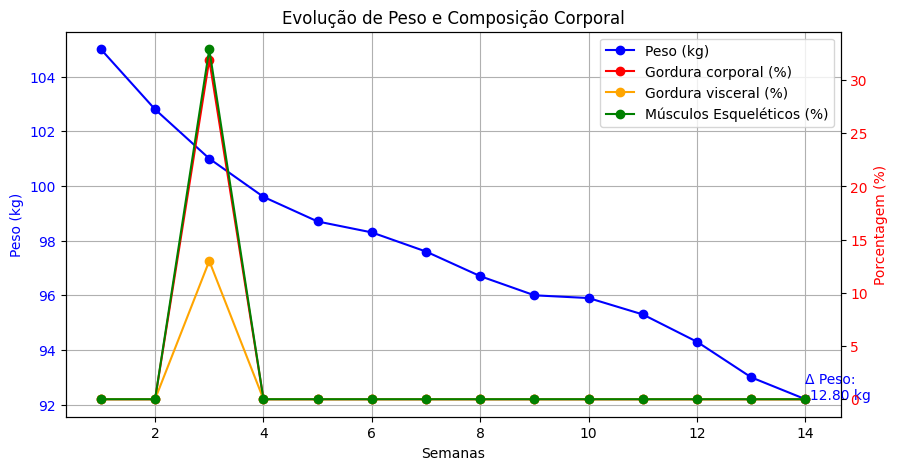

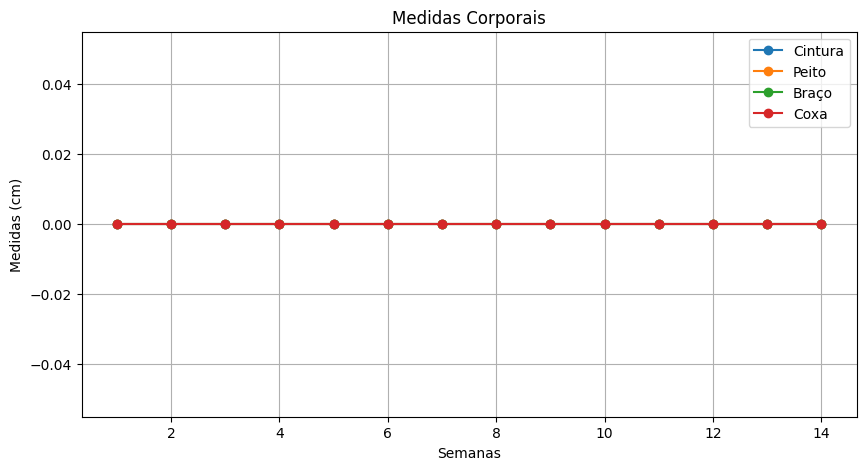

In [12]:
# ACOMPANHAMENTO DA EVOLUÇÃO

# Caminho para o arquivo CSV de evolução
evolucao_path = 'evolucao.csv'

# FUNÇÃO PARA ADICIONAR REGISTROS
def adicionar_medida(data, peso, gordura_corporal, gordura_visceral,
                     musculos_esqueleticos, cintura, peito, braco, coxa, observacoes):
    """
    Adiciona um registro de medidas ao arquivo CSV.
    """
    # 1. Testa valores iniciais e prepara o padrão para entrada vazia
    if not data:
        data = date.today().strftime("%d/%m/%Y")
    else:
        data = datetime.strptime(data, "%d/%m/%Y").date().strftime("%d/%m/%Y")

    # 2. Carrega dados existentes para calcular 'semana' e 'var'
    df_evolucao_atual = pd.DataFrame()
    if os.path.exists(evolucao_path):
        df_evolucao_atual = pd.read_csv(evolucao_path)

    semana = len(df_evolucao_atual) + 1

    # 3. Calcula a variação (var) de peso
    var = 0.0
    if not df_evolucao_atual.empty and 'peso' in df_evolucao_atual.columns:
        ultimo_peso = df_evolucao_atual['peso'].iloc[-1]
        var = peso - ultimo_peso
    
    # 4. Insere os dados no arquivo
    nova_medida = pd.DataFrame([{
        'semana': semana,
        'data': data,
        'peso': peso,
        'var': var,
        'gordura_corporal': gordura_corporal if gordura_corporal else 0.0,
        'gordura_visceral': gordura_visceral if gordura_visceral else 0.0,
        'musculos_esqueleticos': musculos_esqueleticos if musculos_esqueleticos else 0.0,
        'cintura': cintura if cintura else 0.0,
        'peito': peito if peito else 0.0,
        'braco': braco if braco else 0.0,
        'coxa': coxa if coxa else 0.0,
        'observacoes': observacoes
    }])

    # Adiciona o peso atual no banco de dados "pessoais"
    try:
        df_pessoais.loc[0, 'peso'] = peso
        df_pessoais.to_csv(dados_pessoais_path, index=False)
    except:
        print('Não foi possível atualizar o peso no banco de dados "pessoais"')
    
    if not os.path.exists(evolucao_path):
        nova_medida.to_csv(evolucao_path, index=False)
    else:
        nova_medida.to_csv(evolucao_path, mode='a', header=False, index=False)
    print("Medida adicionada com sucesso.")

# FUNÇÃO PARA GERAR GRÁFICOS
def gerar_graficos():
    """Gera gráficos a partir dos dados de evolução no CSV."""
    if not os.path.exists(evolucao_path):
        print("Não há dados de evolução para gerar os gráficos.")
        return

    df_evolucao = pd.read_csv(evolucao_path)

    if df_evolucao.empty:
        print("Não há dados suficientes para gerar os gráficos.")
        return

    df_evolucao['data'] = pd.to_datetime(df_evolucao['data'], format="%d/%m/%Y")
    df_evolucao = df_evolucao.sort_values(by='data')

    semanas = df_evolucao['semana']
    peso = df_evolucao['peso']
    gordura_corporal = df_evolucao['gordura_corporal']
    gordura_visceral = df_evolucao['gordura_visceral']
    musculos = df_evolucao['musculos_esqueleticos']
    cintura = df_evolucao['cintura']
    peito = df_evolucao['peito']
    braco = df_evolucao['braco']
    coxa = df_evolucao['coxa']
    
    # --- Gráfico Peso e Gordura com Eixo Secundário ---
    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.set_xlabel("Semanas")
    ax1.set_ylabel("Peso (kg)", color='blue')
    
    if any(p is not None for p in peso):
        ax1.plot(semanas, peso, label="Peso (kg)", marker='o', color='blue')
    
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    if len(peso) > 1 and all(p is not None for p in peso):
        peso_inicial = peso.iloc[0]
        peso_final = peso.iloc[-1]
        var_total = peso_final - peso_inicial
        
        x_pos = float(semanas.iloc[-1])
        y_pos = peso_final
        
        texto = f"Δ Peso:\n{var_total:.2f} kg"
        
        ax1.annotate(
            texto,
            xy=(x_pos, y_pos),
            xytext=(x_pos, y_pos),
            fontsize=10,
            color='blue'
        )

    ax2 = ax1.twinx()
    ax2.set_ylabel("Porcentagem (%)", color='red')
    ax2.plot(semanas, gordura_corporal, label="Gordura corporal (%)", marker='o', color='red')
    ax2.plot(semanas, gordura_visceral, label="Gordura visceral (%)", marker='o', color='orange')
    ax2.plot(semanas, musculos, label="Músculos Esqueléticos (%)", marker='o', color='green')
    ax2.tick_params(axis='y', labelcolor='red')

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2)
    
    plt.title("Evolução de Peso e Composição Corporal")
    plt.show()

    # 2. Gráfico Medidas Corporais
    plt.figure(figsize=(10,5))
    plt.plot(semanas, cintura, label="Cintura", marker='o')
    plt.plot(semanas, peito, label="Peito", marker='o')
    plt.plot(semanas, braco, label="Braço", marker='o')
    plt.plot(semanas, coxa, label="Coxa", marker='o')
    plt.title("Medidas Corporais")
    plt.xlabel("Semanas")
    plt.ylabel("Medidas (cm)")
    plt.legend()
    plt.grid(True)
    plt.show()
gerar_graficos()

In [13]:
# INTERROMPE O PROGRAMA INICIAL AUTOMÁTICO (FIM)
print("Programa carregado com sucesso.")
sys.exit()

Programa carregado com sucesso.


SystemExit: 

C:\Users\flavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# REFAZER DIETA

refeicoes_path = 'refeicoes_salvas.csv'

dados_refeicoes = []
for nome_ref in nomes_refeicoes:
    print(f"\n--- {nome_ref} ---")
    i = 1
    while i <= 6:
        palavra = input(f"Alimento {i} (digite parte do nome ou deixe vazio para parar): ").strip()
        if not palavra:
            break
        alimento = buscar_alimento(palavra, tabela_alimentacao)
        if alimento is None:
            print("Alimento não encontrado, tente novamente.")
            continue
        try:
            qtd = float(input(f"Quantidade de {alimento} (g): "))
        except ValueError:
            print("Quantidade inválida, pulando alimento.")
            continue
        dados_refeicoes.append({'Refeicao': nome_ref, 'Alimento': alimento, 'Quantidade': qtd})
        i += 1
df_refeicoes = pd.DataFrame(dados_refeicoes)
df_refeicoes.to_csv(refeicoes_path, index=False)

print(df_refeicoes)

In [ ]:
# EDITAR DIETA

print(df_refeicoes)

refeicoes_path = 'refeicoes_salvas.csv'
df_refeicoes = pd.read_csv(refeicoes_path, encoding="latin1")

coordenada_refeicoes = input("Digite a coordenada da refeição que deseja editar (0-y),(0-2). Exemplo: 2,0: ")
linha, coluna = map(int, coordenada_refeicoes.split(','))

if 0 <= linha < df_refeicoes.shape[0] and 0 <= coluna < df_refeicoes.shape[1]:
    novo_valor = input(f"Digite o novo valor para {df_refeicoes.columns[coluna]}: ")
    if coluna == 1:
        novo_alimento = buscar_alimento(novo_valor, tabela_alimentacao)
        if novo_alimento is None:
            print("Alimento não encontrado, tente novamente.")
        novo_valor = novo_alimento

    if coluna == 2:
        novo_valor = float(novo_valor)


    # CÁLCULO DOS NUTRIENTES
    total_proteinas = 0
    total_carboidratos = 0
    total_gorduras = 0
    total_sodio = 0
    total_calorias = 0
    
    for _, row in df_refeicoes.iterrows():
        alimento = row['Alimento']
        qtd = row['Quantidade']
    
        alimento_proc = normalizar_texto(alimento)
        
        tabela_encontrados = tabela_alimentacao[tabela_alimentacao['Alimento_proc'].str.contains(alimento_proc, na=False)]

        if not tabela_encontrados.empty:
            fator = qtd / 100
            total_proteinas += float(tabela_encontrados['Proteina(g)'].values[0]) * fator
            total_carboidratos += float(tabela_encontrados['Carboidrato(g)'].values[0]) * fator
            total_gorduras += float(tabela_encontrados['Lipideos(g)'].values[0]) * fator
            total_sodio += float(tabela_encontrados['Sodio(mg)'].values[0]) * fator
            total_calorias += float(tabela_encontrados['Energia(kcal)'].values[0]) * fator
        else:
            print(f"⚠️ Alimento não encontrado no banco: {alimento}")

    df_refeicoes.iat[linha, coluna] = novo_valor
    df_refeicoes.to_csv(refeicoes_path, index=False)
    print('\n Refeições alteradas! \n', df_refeicoes)

    recomendacao = obter_recomendacao_diaria(sexo, objetivo, intensidade)

    if recomendacao is not None:
        # RESULTADO FINAL
        print("\n📊 Total diário:")
        print(f"Proteínas: {total_proteinas:.2f} g   (", round(total_proteinas / (recomendacao.values[3] * peso) * 100, 2), '% de', round(recomendacao.values[3] * peso, 2), 'g)')
        print(f"Carboidratos: {total_carboidratos:.2f} g   (", round(total_carboidratos / (recomendacao.values[4] * peso) * 100, 2), '% de', round(recomendacao.values[4] * peso, 2), 'g)')
        print(f"Gorduras: {total_gorduras:.2f} g   (", round(total_gorduras / (recomendacao.values[5] * peso) * 100, 2), '% de', round(recomendacao.values[5] * peso, 2), 'g)')
        print(f"Sódio: {total_sodio:.2f} mg   (", round(total_sodio / (recomendacao.values[6]) * 100, 2), '% de', round(recomendacao.values[6], 2), 'mg)')
        print(f"Calorias: {total_calorias:.2f} kcal   (", round(total_calorias / alvo_calorico * 100, 2), '% de', round(alvo_calorico, 2), 'kcal -alvo-)')

else:
    print("Coordenada inválida.")

In [ ]:
# ADICIONAR DADOS DE MEDIDAS

# Inputs de medidas
data_medida = input("Data da medida (DD/MM/AAAA) ou deixe vazio para hoje: ")
try:
    temp_peso = peso
    peso = float(input("Peso (kg): "))
    if peso == '':
        peso = temp_peso
except ValueError:
    peso = 0.0

gordura_corporal = input("Gordura corporal (%): ")
gordura_visceral = input("Gordura visceral (%): ")
musculos_esqueleticos = input("Músculos esqueléticos (%): ")
cintura = input("Cintura (cm): ")
peito = input("Peito (cm): ")
braco = input("Braço (cm): ")
coxa = input("Coxa (cm): ")
observacoes = input("Observações: ").strip()

adicionar_medida(data_medida, peso, gordura_corporal, gordura_visceral,
                 musculos_esqueleticos, cintura, peito,
                 braco, coxa, observacoes)

gerar_graficos()

In [ ]:
# ADICIONAR NOVO TREINO

# Inputs do treino
data_treino = input("Data do treino (DD/MM/AAAA) ou deixe vazio para hoje: ").strip()
tipo_treino = input("Tipo de treino (Cardio/Musculação): ").strip().lower()
intensidade_treino = input("Intensidade do treino (Leve/Moderado/Intenso): ").strip().lower()
try:
    duracao_min = int(input("Duração do treino (em minutos): "))
except ValueError:
    duracao_min = 0
try:
    carga_total = float(input("Carga total levantada (em kg, apenas para musculação): ") or 0)
except ValueError:
    carga_total = 0

# Cálculo de calorias gastas
calorias_treino = calcular_gasto_calorico(tipo_treino == "cardio", intensidade_treino, duracao_min, peso, carga_total)

# Adição do treino ao CSV
adicionar_treino(tipo_treino, duracao_min, calorias_treino, data_treino)
print("\nEstatísticas de Treino:")
estatisticas()

In [ ]:
#import ipynb_py_convert

#ipynb_py_convert.convert('APPFIT.ipynb', 'APPFIT_TESTE.py')